In [2]:
import numpy as np
import json
import pandas as pd
import sys
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format = 'retina'
BASE_PATH = os.path.dirname(os.path.abspath('./'))
print(BASE_PATH)

In [3]:
model_dir = os.path.join(BASE_PATH, "/analysis/full_model_dir/")
exp_dir = os.path.join(BASE_PATH, "/experiments/")
def confidence_half(arr, alpha = 0.95):
    '''
    half of the confidence interval length
    which is *(s/√n)
    '''
    l = len(arr)
    t = np.abs(st.t.ppf((1-alpha)/2,l-1))
    return round(np.std(arr)*t/np.sqrt(l),1)


In [1]:
datasets = ["sst-2", "ag_news", "pubmed", "qqp"]
datasets = ["paws-qqp", "qnli", "imdb", "sst-2", "ag_news", "pubmed", "qqp", "dbpedia"]
batchsize = 50
seeds = ["42","100","200","300","400"]

In [4]:
f1_dic = {}
for dataset in datasets:
    f1_macro = []
    for seed in seeds:
        with open(model_dir+dataset+"_bert_cal_"+str(seed)+"/"+dataset+"_bert/all_"+str(seed)+"/test_results.txt",'r') as f:
            f1_macro.append(float(f.readline().split(":")[-1].replace("\n","")))
    f1_dic[dataset] = np.average(f1_macro)
    print(dataset, np.average(f1_macro))

paws-qqp 0.79688
qnli 0.9073399999999999
imdb 0.9168
sst-2 0.91426
ag_news 0.9435800000000001
pubmed 0.80992
qqp 0.89258
dbpedia 0.99312


In [ ]:
#datasets = ["paws-qqp", "qnli", "imdb", "sst-2", "ag_news", "pubmed", "qqp"]
#seeds = ['42','100','200','300','400']
# dataset = 'ag_news'
# method = methods[0]
path = "tyrogue/"

methods = [
    "tyrogue_r3_Srand10000",
]
others = [
    "entropy",
    "FTbertKM",
     "cal",
    "alps",
    "badge",
    "random", 
    # "tyrogue",
    # "naive", 
]


x_axis = 'total_train_samples'
markers = ['v','o','*','x','<','^','s','1','2','3','4','5']

def percentage(s, r, batchsize):
    return [1/r, r*batchsize/s]

res_flag='test_results'
measurement = 'f1_macro'
    
target_percentage = [.85,.9,.95]  


tp_dic={}
for tp in target_percentage:
    print("###################",tp,"###################")
    data_dic ={}
    for dataset in datasets:
        
    # if dataset in ['sst-2', 'ag_news']:
    #     target_percentage = [.85,.9,.95,.97]
    # elif dataset in ['pubmed']:
    #     # target_percentage = [.8,.85,.9]
    #     target_percentage = [.85,.9,.95]
    # elif dataset in ['qqp']:
    #     target_percentage = [.85,.9,.95]        
        print(dataset, "-------",tp,"--------", tp*f1_dic[dataset])
        method_dic={}
        for method in methods:
            print(method)
            label_costs = []
            for seed in seeds:
                if method == 'entropy' and dataset in ['qqp','sst-2', 'ag_news', 'pubmed']:
                    infile = exp_dir+"tyrogue/"+dataset+"/al_bert_"+method+"_"+str(batchsize)+"/" + seed + "_vanilla_cls"
                else:
                    infile = exp_dir+path+dataset+"/al_bert_"+method+"_"+str(batchsize)+"/" + seed + "_cls"
                    # for infile in infiles:
                try:
                    with open(infile+"/results_of_iteration.json") as f:
                        res = json.load(f)
                    num_iter = res['last_iteration']
                    flag_achieve = False
                    for ind_iter in range(num_iter):
                        if res[str(ind_iter+1)][res_flag][measurement] > tp*f1_dic[dataset]:
                            label_costs.append(ind_iter*50)
                            flag_achieve = True
                            break
                    if flag_achieve == False:
                        label_costs.append(1000)
                except Exception:
                    
                    print(sys.exc_info(), infile)
            print(np.average(label_costs),"("+str(len(label_costs))+"/5)")
            
            method_dic["proposed"]=(np.average(label_costs), confidence_half(label_costs))
            #if method_dic["proposed"] >= 999 or method_dic["proposed"]==None:
            #    method_dic["proposed"]=0


        for method in others:
            print(method)
            label_costs = []
            for seed in seeds:
                if method == 'entropy' and dataset in ['qqp','sst-2', 'ag_news', 'pubmed']:
                    infile = exp_dir+"existing_method/"+dataset+"/al_bert_"+method+"_"+str(batchsize)+"/" + seed + "_vanilla_cls"
                else:
                    infile = exp_dir+"existing_method/"+dataset+"/al_bert_"+method+"_"+str(batchsize)+"/" + seed + "_cls"
                    # for infile in infiles:
                
                try:
                    with open(infile+"/results_of_iteration.json") as f:
                        res = json.load(f)
                    num_iter = res['last_iteration']
                    flag_achieve = False
                    for ind_iter in range(num_iter):
                        if res[str(ind_iter+1)][res_flag][measurement] > tp*f1_dic[dataset]:
                            label_costs.append(ind_iter*50)
                            flag_achieve = True
                            break
                        elif ind_iter >= 20:
                            break
                    if flag_achieve == False:
                        label_costs.append(1000)
                except Exception:
                    print(sys.exc_info(), infile)
            print(np.average(label_costs),"("+str(len(label_costs))+"/5)")
            method_dic[method]=(np.average(label_costs), confidence_half(label_costs))
            #if method_dic[method] >= 999 or method_dic[method]==None:
            #    method_dic[method]=0
            
        data_dic[dataset]=method_dic
    tp_dic[float(tp)]=data_dic
#tp_dic = {float(k):v for k,v in tp_dic.items()}

################### 0.85 ###################
paws-qqp ------- 0.85 -------- 0.6773480000000001
rand_clus_unc_r3_Srand10000
640.0 (5/5)
entropy
480.0 (5/5)
FTbertKM
770.0 (5/5)
cal
470.0 (5/5)
alps
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7ffff038c460>) /nfs/shared/labeler_al/experiments/model_reuse/paws-qqp/al_bert_alps_50/300_cls
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7ffff038c460>) /nfs/shared/labeler_al/experiments/model_reuse/paws-qqp/al_bert_alps_50/400_cls
750.0 (3/5)
badge
550.0 (5/5)
random
860.0 (5/5)
qnli ------- 0.85 -------- 0.7712389999999999
rand_clus_unc_r3_Srand10000
360.0 (5/5)
entropy
400.0 (5/5)
FTbertKM
360.0 (5/5)
cal
470.0 (5/5)
alps
420.0 (5/5)
badge
360.0 (5/5)
random
320.0 (5/5)
imdb ------- 0.85 -------- 0.77928
rand_clus_unc_r3_Srand10000
180.0 (5/5)
entropy
210.0 (5/5)
FTbertKM
200.0 (5/5)
cal
210.0 (5/5)
alps
(<class 'FileNotFoundE

/nfs/local/miniconda3/envs/seiji_al37/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/nfs/local/miniconda3/envs/seiji_al37/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/nfs/local/miniconda3/envs/seiji_al37/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/nfs/local/miniconda3/envs/seiji_al37/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/nfs/local/miniconda3/envs/seiji_al37/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


980.0 (5/5)
alps
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff1439d8c0>) /nfs/shared/labeler_al/experiments/model_reuse/qqp/al_bert_alps_50/42_cls
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff1439d8c0>) /nfs/shared/labeler_al/experiments/model_reuse/qqp/al_bert_alps_50/100_cls
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff1439d8c0>) /nfs/shared/labeler_al/experiments/model_reuse/qqp/al_bert_alps_50/200_cls
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff1439d8c0>) /nfs/shared/labeler_al/experiments/model_reuse/qqp/al_bert_alps_50/300_cls
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff1439d8c0>) /nfs/shared/labeler_al/experiments/model_reuse/qqp/al_bert_alps_50/400_cls
nan (0/5)
badg

In [6]:
dataset_rename= {"imdb":"IMDB", "sst-2":"SST-2",
           "dbpedia":"DBPEDIA","ag_news":"AgNews",
           "pubmed":"PubMed", "qnli":"QNLI", 
           "paws-qqp":"PAWS-QQP", "qqp":"QQP"}
alg_rename = {'proposed': 'TYROGUE',
             'cal': 'CAL',
             'entropy': 'Entropy',
             'FTbertKM': 'FTbertKM',
             'alps': 'ALPS',
             'badge': 'BADGE',
             'random': 'Random'}
dataset_order = [ "IMDB", "SST-2", "DBPEDIA", "AgNews", "PubMed", "QNLI", "PAWS-QQP", "QQP"]
alg_order = ['TYROGUE','CAL', 'Entropy',  'FTbertKM', 'ALPS', 'BADGE','Random']

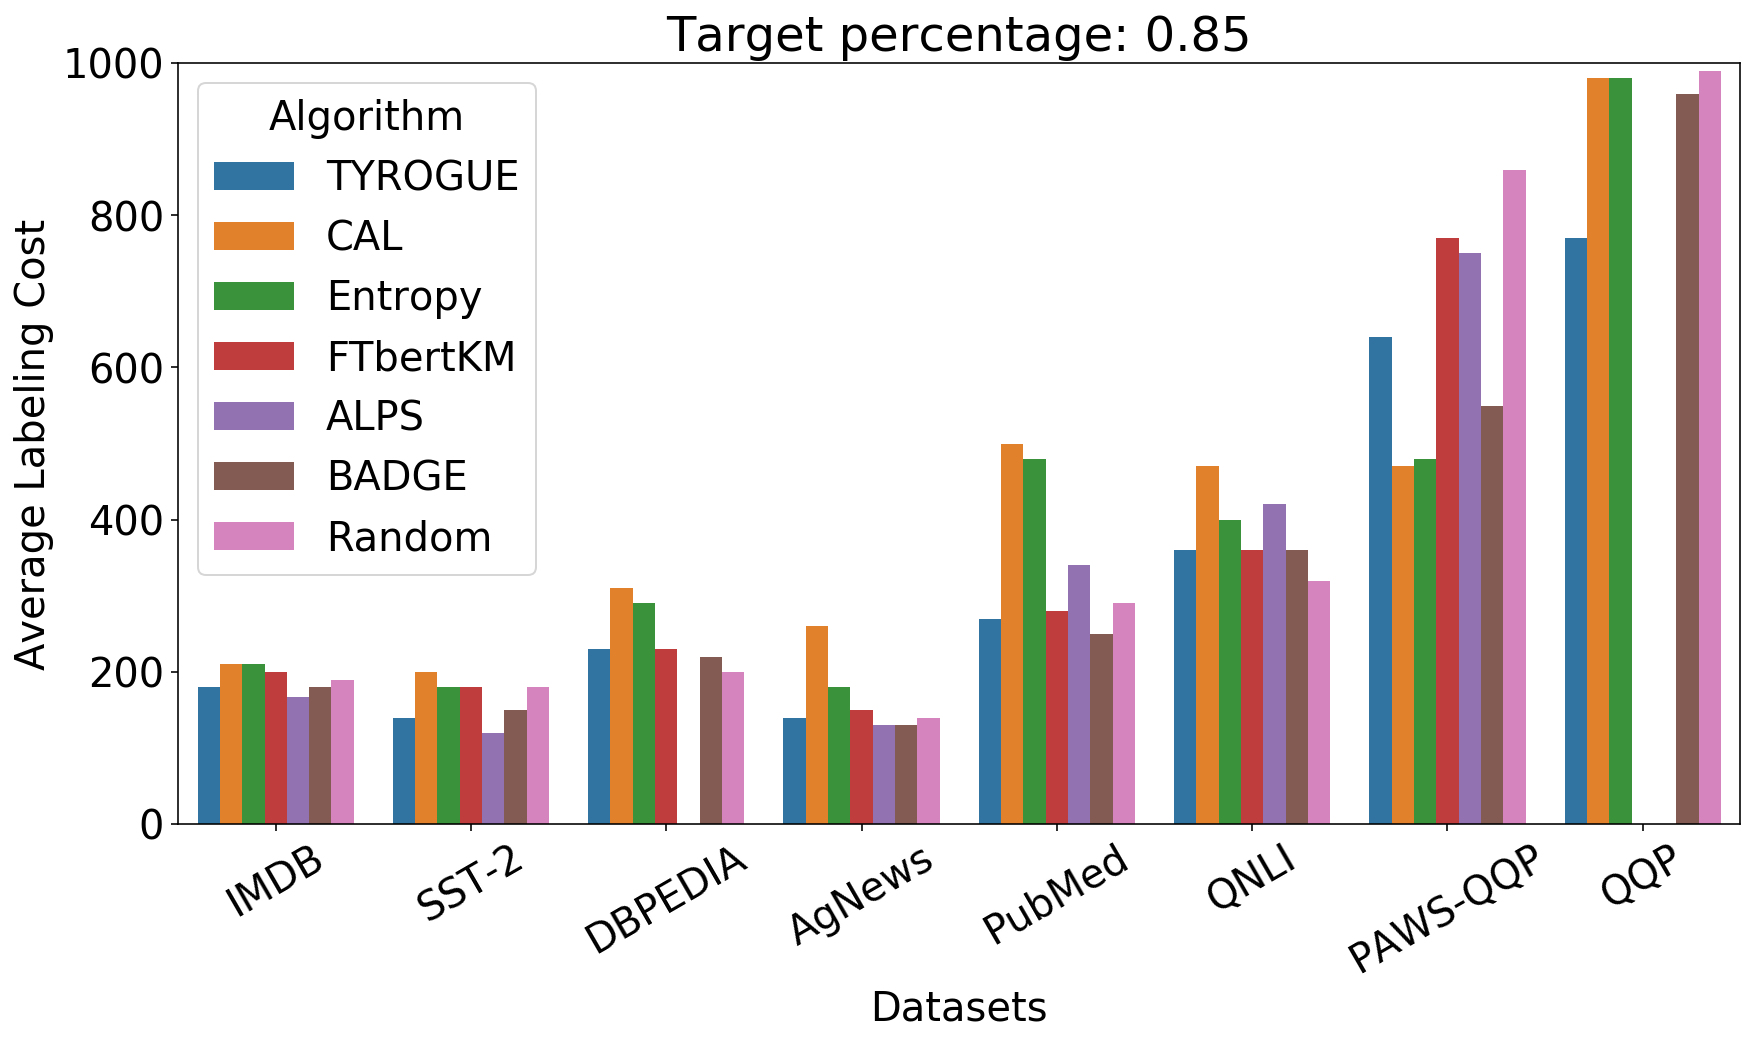

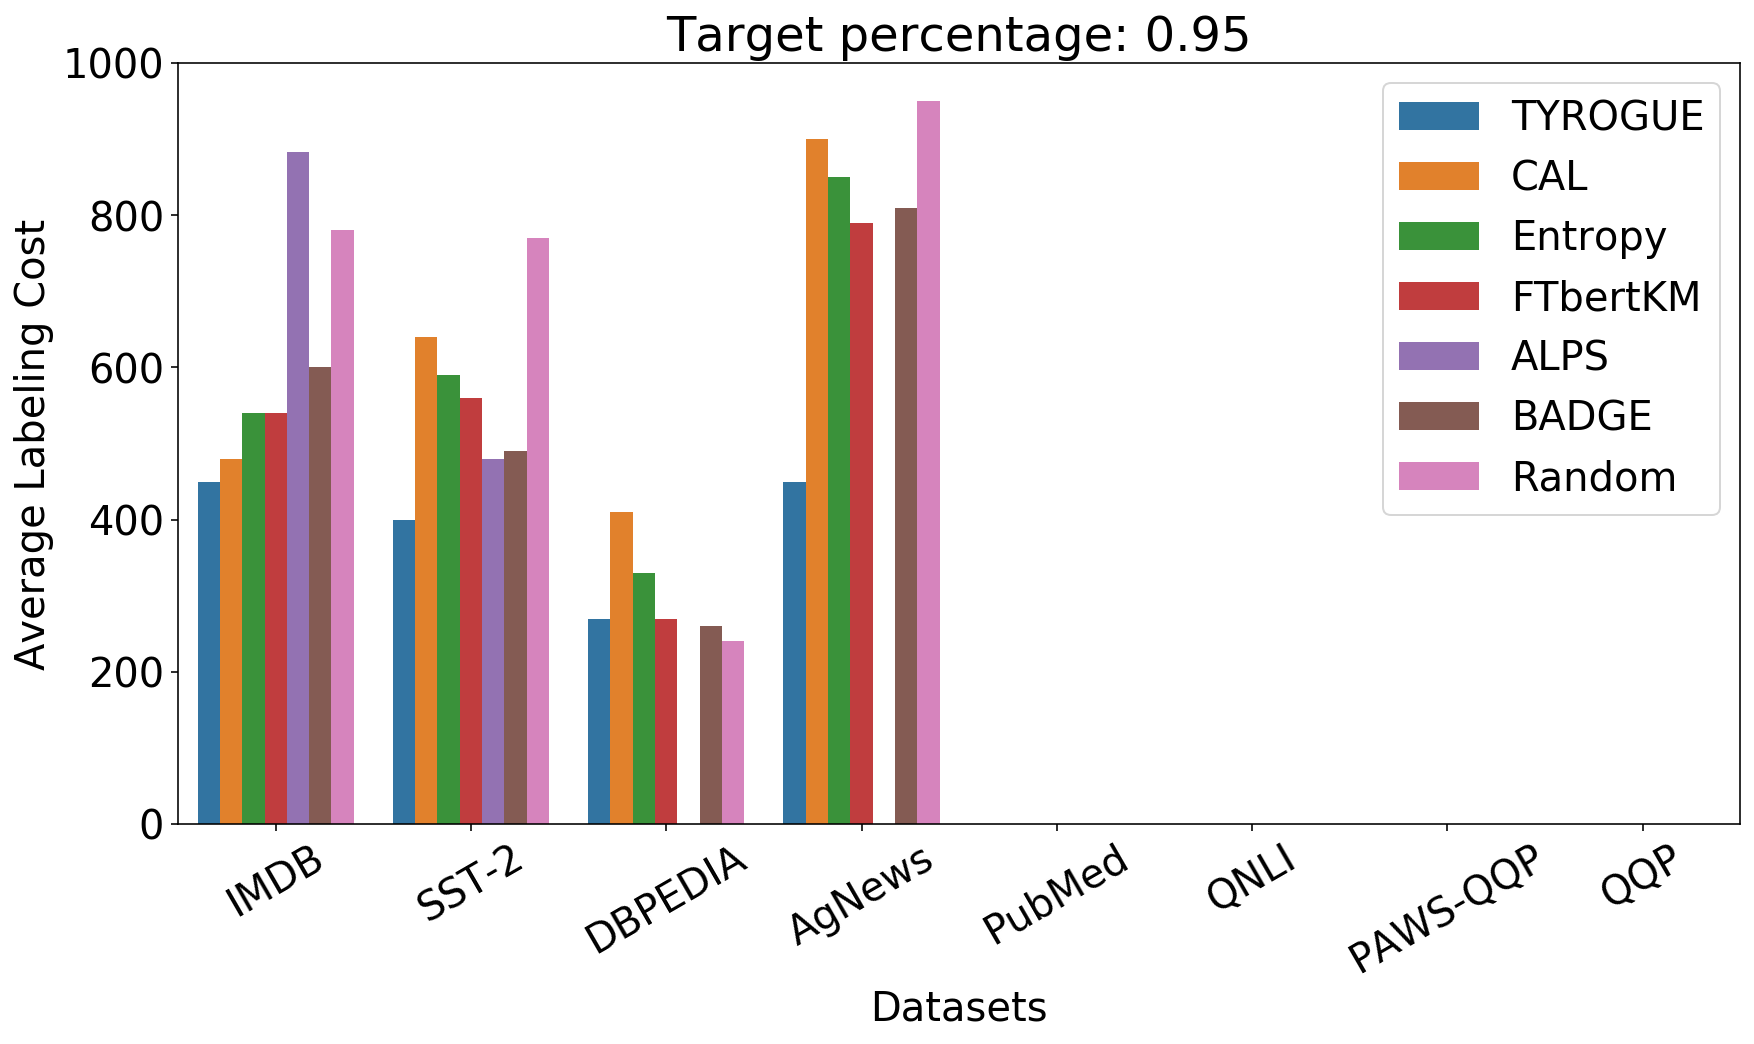

In [17]:
target_percentage=[0.85,0.95]
output_dir='/nfs/shared/labeler_al/low-budget-AL/analysis/figure'
cost_ci_dic = {}
cost_dic = {}

for i,tp in enumerate(target_percentage):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(111)

    df = pd.DataFrame(tp_dic[tp]).rename(columns=dataset_rename).rename(index=alg_rename).loc[alg_order][dataset_order]
    cost_df = df.applymap(lambda x: x[0]).fillna(0).replace(1000,np.nan)
    # cost dataframe with confidence interval
    cost_ci_df = df.applymap(lambda x: "{}+/-{}".format(round(x[0],1), x[1]) if not (np.isnan(x[0]) or x[0]==1000)  else "-")
    cost_ci_dic[tp] = cost_ci_df
    cost_dic[tp] = cost_df

    cost_df = cost_df.reset_index().rename(columns = {'index':'Algorithm'})
    cost_df = pd.melt(cost_df, id_vars=['Algorithm'], value_vars=dataset_order).rename(columns = {'variable':'Dataset', 'value':"Cost"})
    cost_dic[tp] = cost_df
    sns.barplot(x = "Dataset", 
                y = "Cost", 
                hue = "Algorithm", 
                data = cost_df,
                order = dataset_order,
                hue_order = alg_order,
                ax = ax)
    plt.rcParams["font.size"] = 20
    if tp==0.95:
        plt.legend(loc='upper right')
    plt.xlabel('Datasets')
    plt.ylabel("Average Labeling Cost")
    plt.ylim(0,1000)
    plt.xticks(rotation=30)
    plt.title("Target percentage: "+str(tp))
    # fig.savefig(os.path.join(output_dir, "cost_{}.pdf".format(int(tp*100))), dpi=200)

    plt.show()


In [18]:
cost_df = cost_dic[0.85]
cost_df.groupby('Dataset').apply(lambda x: x.sort_values('Cost'))
cost_df['rank'] = cost_df.groupby('Dataset')['Cost'].rank('dense')
cost_df[cost_df['Algorithm']=='TYROGUE']

,Algorithm,Dataset,Cost,rank
0,TYROGUE,IMDB,180.0,2.0
7,TYROGUE,SST-2,140.0,2.0
14,TYROGUE,DBPEDIA,230.0,4.0
21,TYROGUE,AgNews,140.0,2.0
28,TYROGUE,PubMed,270.0,2.0
35,TYROGUE,QNLI,360.0,2.0
42,TYROGUE,PAWS-QQP,640.0,4.0
49,TYROGUE,QQP,770.0,2.0


In [19]:
df = pd.DataFrame(
    {
        "group": ["a", "a", "a", "a", "a", "b", "b", "b", "b", "b"],
        "value": [2, 4, 2, 3, 5, 1, 2, 4, 1, 5],
    }
)
for method in ['average', 'min', 'max', 'dense', 'first']:
    df[f'{method}_rank'] = df.groupby('group')['value'].rank(method)

# TIME analysis

In [50]:
import glob

settings = [
    "existing_method",
]
methods = [
    "tyrogue_r3_Srand10000",
    "entropy",
    "cal",
    "FTbertKM",
    "alps",
    "badge",
    "random", 
]
batchsizes = [50]
setting = settings[0]
batchsize = batchsizes[0]
time_dic = {}
for dataset in datasets:
    print("----",dataset,"----")
    res_dic = dict()
    for method in methods:
        if "tyrogue" in method:
            setting = "tyrogue"
        else:
            setting = "existing_method"
        
        try:
            avg_per_seed = []
            infiles = sorted(glob.glob(exp_dir+setting+"/"+dataset+"/al_bert_"+method+"_"+str(batchsize)+"/*"))
            #print(infiles)
            method = method.replace("10000","10K").replace("tyrogue","proposed").split("_")[0]
            res_dic[method] = (np.nan, np.nan)
            for infile in infiles:
        #     print(infiles[0])
                with open(infile+"/results_of_iteration.json") as f:
                    res = json.load(f)
                num_iter = res['last_iteration']
    #             time_dic["training"] = []
    #             time_dic["inference"] = []
    #             time_dic["selection"] = []
        #             n_samples = []
                tmp_time = res['1']['inference_time'] + res['1']['selection_time'] 
                training_time = res['1']['training_time']

                for ind_iter in range(1,min(num_iter,20)):
                    tmp_time += res[str(ind_iter+1)]['inference_time'] + res[str(ind_iter+1)]['selection_time'] #+res[str(ind_iter+1)]['training_time'] # + 
                    training_time += res[str(ind_iter+1)]['training_time'] 
                #res_dic[method] += tmp_time/min(num_iter,20)
                avg_per_seed.append(tmp_time/min(num_iter,20))
            res_dic[method] = np.mean(avg_per_seed), confidence_half(avg_per_seed), training_time
            
        except Exception:
            print(sys.exc_info(), infile)
    time_dic[dataset] = res_dic


---- paws-qqp ----
---- qnli ----
---- imdb ----
---- sst-2 ----
---- ag_news ----
---- pubmed ----
---- qqp ----
---- dbpedia ----
(<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'), <traceback object at 0x7fff09cd5050>) /nfs/shared/labeler_al/experiments/model_reuse/dbpedia/al_bert_alps_50/42_cls


In [250]:
df = pd.DataFrame(time_dic).rename(columns=dataset_rename).rename(index=alg_rename).loc[alg_order][dataset_order]
time_df = df.applymap(lambda x: x[0]).fillna(0)

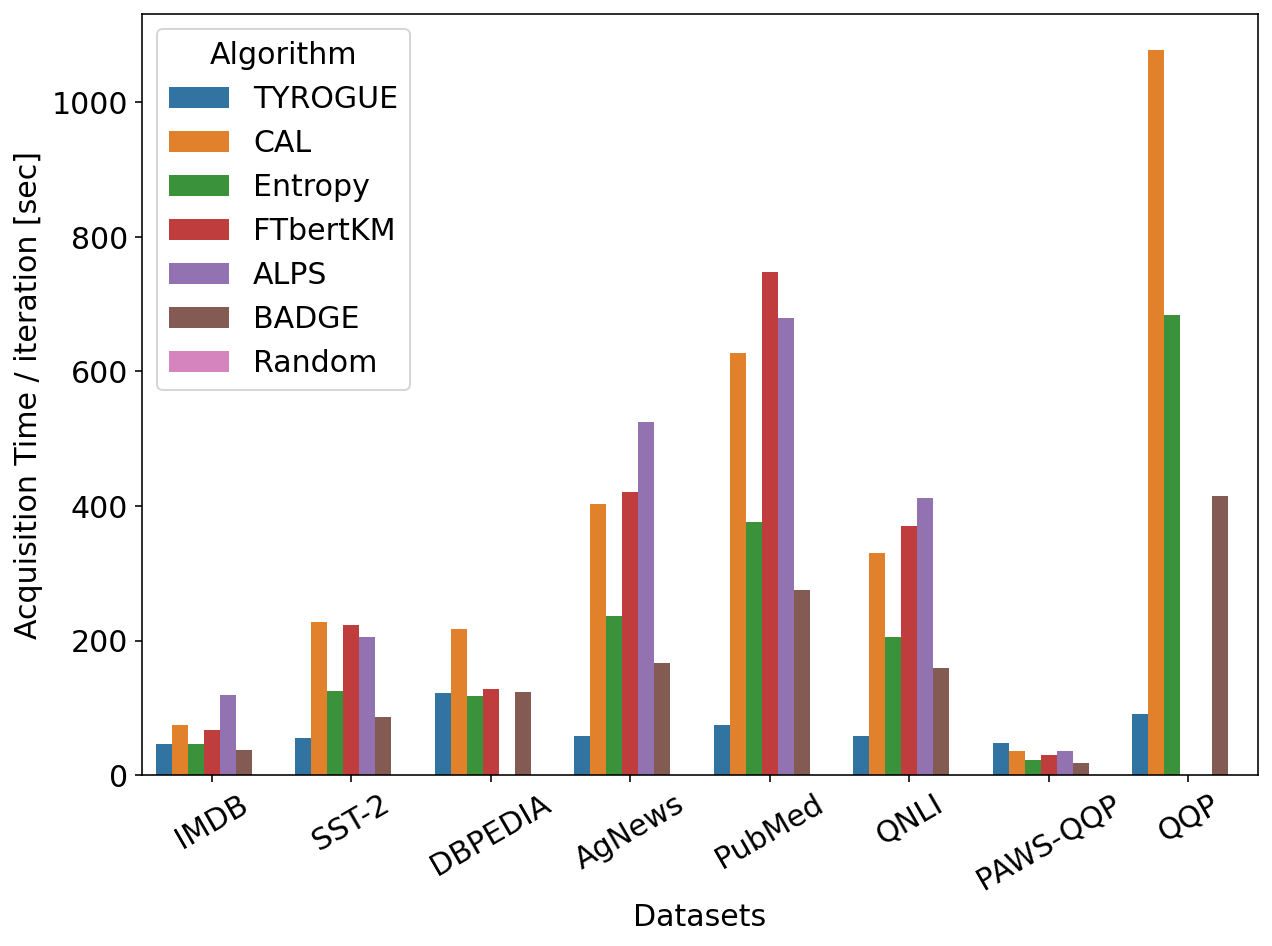

In [254]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

df = pd.DataFrame(time_dic).rename(columns=dataset_rename).rename(index=alg_rename).loc[alg_order][dataset_order]
time_df = df.applymap(lambda x: x[0]).fillna(0)
# cost dataframe with confidence interval
time_ci_df = df.applymap(lambda x: "{}+/-{}".format(round(x[0],1), x[1]) if not np.isnan(x[0])  else "-")

time_df = time_df.reset_index().rename(columns = {'index':'Algorithm'})
time_df = pd.melt(time_df, id_vars=['Algorithm'], value_vars=dataset_order).rename(columns = {'variable':'Dataset', 'value':"Time"})

sns.barplot(x = "Dataset", 
            y = "Time", 
            hue = "Algorithm", 
            data = time_df,
            order = dataset_order,
            hue_order = alg_order,
            ax = ax)
plt.rcParams["font.size"] = 15
plt.rc('legend',fontsize=15)
plt.xlabel('Datasets')
plt.ylabel("Acquisition Time / iteration [sec]")

plt.xticks(rotation=30)
fig.savefig(os.path.join(output_dir, "latency.pdf".format(int(tp*100))), dpi=200)
plt.show()


In [21]:
cost_df

,Algorithm,Dataset,Cost,rank
0,TYROGUE,IMDB,180.000000,2.0
1,CAL,IMDB,210.000000,5.0
2,Entropy,IMDB,210.000000,5.0
3,FTbertKM,IMDB,200.000000,4.0
4,ALPS,IMDB,166.666667,1.0
5,BADGE,IMDB,180.000000,2.0
6,Random,IMDB,190.000000,3.0
7,TYROGUE,SST-2,140.000000,2.0
8,CAL,SST-2,200.000000,5.0
9,Entropy,SST-2,180.000000,4.0


Algorithm   Dataset   Cost
Dataset                               
AgNews   27    Random    AgNews  150.0
         21   TYROGUE    AgNews  180.0
         24  FTbertKM    AgNews  180.0
         25      ALPS    AgNews  180.0
         26     BADGE    AgNews  190.0
         23   Entropy    AgNews  240.0
         22       CAL    AgNews  320.0
DBPEDIA  18      ALPS   DBPEDIA    0.0
         20    Random   DBPEDIA  210.0
         19     BADGE   DBPEDIA  230.0
         17  FTbertKM   DBPEDIA  250.0
         16   Entropy   DBPEDIA  310.0
         15       CAL   DBPEDIA  370.0
         14   TYROGUE   DBPEDIA  410.0
IMDB     4       ALPS      IMDB  200.0
         0    TYROGUE      IMDB  220.0
         1        CAL      IMDB  250.0
         2    Entropy      IMDB  250.0
         5      BADGE      IMDB  250.0
         3   FTbertKM      IMDB  260.0
         6     Random      IMDB  270.0
PAWS-QQP 43       CAL  PAWS-QQP  820.0
         44   Entropy  PAWS-QQP  880.0
         45  FTbertKM  PAWS-QQP  920.0
         42   TYROGUE  PAWS-QQP  950.0
         47     BADGE  PAWS-QQP  990.0
         46      ALPS  PAWS-QQP    NaN
         48    Random  PAWS-QQP    NaN
PubMed   28   TYROGUE    PubMed  420.0
         33     BADGE    PubMed  500.0
         31  FTbertKM    PubMed  600.0
         32      ALPS    PubMed  740.0
         29       CAL    PubMed  800.0
         34    Random    PubMed  820.0
         30   Entropy    PubMed  950.0
QNLI     37   Entropy      QNLI  750.0
         36       CAL      QNLI  790.0
         40     BADGE      QNLI  860.0
         35   TYROGUE      QNLI  900.0
         38  FTbertKM      QNLI    NaN
         39      ALPS      QNLI    NaN
         41    Random      QNLI    NaN
QQP      52  FTbertKM       QQP    0.0
         53      ALPS       QQP    0.0
         49   TYROGUE       QQP    NaN
         50       CAL       QQP    NaN
         51   Entropy       QQP    NaN
         54     BADGE       QQP    NaN
         55    Random       QQP    NaN
SST-2    7    TYROGUE     SST-2  190.0
         11      ALPS     SST-2  190.0
         12     BADGE     SST-2  230.0
         10  FTbertKM     SST-2  240.0
         8        CAL     SST-2  260.0
         13    Random     SST-2  260.0
         9    Entropy     SST-2  270.0

In [255]:
time_ci_df

,IMDB,SST-2,DBPEDIA,AgNews,PubMed,QNLI,PAWS-QQP,QQP
TYROGUE,46.6+/-1.0,54.4+/-1.6,122.2+/-4.5,58.3+/-0.8,73.8+/-2.3,58.4+/-3.3,48.1+/-2.0,90.7+/-1.7
CAL,74.8+/-0.7,227.0+/-35.4,217.6+/-1.5,402.8+/-26.0,628.0+/-43.4,330.4+/-4.7,36.1+/-0.8,1077.4+/-4.1
Entropy,46.3+/-0.0,125.5+/-0.3,117.7+/-0.8,236.8+/-0.5,376.3+/-2.0,204.7+/-0.1,21.9+/-0.0,684.5+/-2.2
FTbertKM,67.4+/-1.5,223.0+/-5.6,127.2+/-1.2,420.8+/-11.5,748.0+/-38.7,369.6+/-26.8,29.3+/-1.5,-
ALPS,119.4+/-4.2,205.9+/-8.1,-,524.4+/-10.8,678.7+/-23.8,411.3+/-4.3,36.1+/-1.1,-
BADGE,36.7+/-0.3,86.0+/-14.0,123.0+/-1.3,166.1+/-10.5,275.8+/-18.3,159.6+/-4.2,17.3+/-0.5,414.1+/-1.5
Random,0.0+/-0.0,0.0+/-0.0,0.1+/-0.0,0.0+/-0.0,0.1+/-0.0,0.1+/-0.0,0.0+/-0.0,0.2+/-0.0


In [14]:
tp = {float(k):v for k,v in tp_dic.items()}

In [49]:
test_df.query('Algorithm in ["BADGE","ALPS","CAL"]')

,Dataset,Cost,rank
Algorithm,,,
CAL,IMDB,210.000000,5.0
ALPS,IMDB,166.666667,1.0
BADGE,IMDB,180.000000,2.0


In [53]:
cost_dic[tp]

,Algorithm,Dataset,Cost
0,TYROGUE,IMDB,450.000000
1,CAL,IMDB,480.000000
2,Entropy,IMDB,540.000000
3,FTbertKM,IMDB,540.000000
4,ALPS,IMDB,883.333333
5,BADGE,IMDB,600.000000
6,Random,IMDB,780.000000
7,TYROGUE,SST-2,400.000000
8,CAL,SST-2,640.000000
9,Entropy,SST-2,590.000000


In [70]:
reduction_ratio = dict()
for tp in [0.85,  0.95]:
    reduction_ratio[tp]=dict()
    for dataset in dataset_order:
        test_df = cost_dic[tp].replace(np.nan,1000)
        test_df = test_df.set_index('Algorithm')
        # test_df = test_df.query('Algorithm in ["TYROGUE","BADGE","ALPS","CAL"]').set_index('Algorithm')
    # dataset = "SST-2"
        print(dataset)

        test_df = test_df[test_df['Dataset']==dataset]
        # print(test_df)
        test_df["DifCost"] = test_df.Cost - test_df.Cost["TYROGUE"]

        # print(test_df)
        print((test_df.DifCost/test_df.Cost).replace(np.nan,0).replace(-np.inf,0))
        reduction_ratio[tp][dataset]=(test_df.DifCost/test_df.Cost).replace(np.nan,0).replace(-np.inf,0)

IMDB
Algorithm
TYROGUE     0.000000
CAL         0.142857
Entropy     0.142857
FTbertKM    0.100000
ALPS       -0.080000
BADGE       0.000000
Random      0.052632
dtype: float64
SST-2
Algorithm
TYROGUE     0.000000
CAL         0.300000
Entropy     0.222222
FTbertKM    0.222222
ALPS       -0.166667
BADGE       0.066667
Random      0.222222
dtype: float64
DBPEDIA
Algorithm
TYROGUE     0.000000
CAL         0.258065
Entropy     0.206897
FTbertKM    0.000000
ALPS        0.000000
BADGE      -0.045455
Random     -0.150000
dtype: float64
AgNews
Algorithm
TYROGUE     0.000000
CAL         0.461538
Entropy     0.222222
FTbertKM    0.066667
ALPS       -0.076923
BADGE      -0.076923
Random      0.000000
dtype: float64
PubMed
Algorithm
TYROGUE     0.000000
CAL         0.460000
Entropy     0.437500
FTbertKM    0.035714
ALPS        0.205882
BADGE      -0.080000
Random      0.068966
dtype: float64
QNLI
Algorithm
TYROGUE     0.000000
CAL         0.234043
Entropy     0.100000
FTbertKM    0.000000
ALPS    

In [71]:
print("Reduction Ratio compared with TYROGUE")
print("Target acc:",0.85)
pd.DataFrame(reduction_ratio[0.85]).T

Reduction Ratio compared with TYROGUE
Target acc: 0.85


Algorithm,TYROGUE,CAL,Entropy,FTbertKM,ALPS,BADGE,Random
IMDB,0.0,0.142857,0.142857,0.100000,-0.080000,0.000000,0.052632
SST-2,0.0,0.300000,0.222222,0.222222,-0.166667,0.066667,0.222222
DBPEDIA,0.0,0.258065,0.206897,0.000000,0.000000,-0.045455,-0.150000
AgNews,0.0,0.461538,0.222222,0.066667,-0.076923,-0.076923,0.000000
PubMed,0.0,0.460000,0.437500,0.035714,0.205882,-0.080000,0.068966
QNLI,0.0,0.234043,0.100000,0.000000,0.142857,0.000000,-0.125000
PAWS-QQP,0.0,-0.361702,-0.333333,0.168831,0.146667,-0.163636,0.255814
QQP,0.0,0.214286,0.214286,0.000000,0.000000,0.197917,0.222222


In [72]:
pd.DataFrame(reduction_ratio[0.85]).T.mean(numeric_only=True)

Algorithm
TYROGUE     0.000000
CAL         0.213636
Entropy     0.151581
FTbertKM    0.074179
ALPS        0.021477
BADGE      -0.012679
Random      0.068357
dtype: float64

In [73]:
print("Reduction Ratio compared with TYROGUE")
print("Target acc:",0.95)
pd.DataFrame(reduction_ratio[0.95]).T

Reduction Ratio compared with TYROGUE
Target acc: 0.95


Algorithm,TYROGUE,CAL,Entropy,FTbertKM,ALPS,BADGE,Random
IMDB,0.0,0.062500,0.166667,0.166667,0.490566,0.250000,0.423077
SST-2,0.0,0.375000,0.322034,0.285714,0.166667,0.183673,0.480519
DBPEDIA,0.0,0.341463,0.181818,0.000000,0.000000,-0.038462,-0.125000
AgNews,0.0,0.500000,0.470588,0.430380,0.550000,0.444444,0.526316
PubMed,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
QNLI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PAWS-QQP,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
QQP,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [66]:
pd.DataFrame(reduction_ratio[0.95]).T.replace(0,np.nan).mean(numeric_only=True)

Algorithm
TYROGUE         NaN
CAL        0.319741
ALPS       0.402411
BADGE      0.209914
dtype: float64

In [28]:
# tmp = pd.DataFrame(cost_dic[0.85].set_index('Algorithm')).T.replace(0,np.nan)
# cols = list(tmp.columns)
cols = list(cost_dic[0.85].set_index('Algorithm').columns)
tmp['best'] = tmp.apply(lambda row : min([row[c] for c in cols]), axis = 1)
tmp['ratio_to_best'] = tmp.apply(lambda row : row['TYROGUE']/row['best'], axis = 1)
tt = tmp.loc[dataset_order]

KeyError: ('Dataset', 'occurred at index Dataset')

In [12]:
tmp = pd.DataFrame(tp[0.9]).T.replace(0,np.nan)
cols = list(tmp.columns)
tmp['best'] = tmp.apply(lambda row : min([row[c] for c in cols]), axis = 1)
tmp['ratio_to_best'] = tmp.apply(lambda row : row['proposed']/row['best'], axis = 1)
tmp.loc[dataset_order]

TypeError: ("unsupported operand type(s) for /: 'tuple' and 'tuple'", 'occurred at index paws-qqp')

In [13]:
tmp

,proposed,entropy,FTbertKM,cal,alps,badge,random,best
paws-qqp,"(950.0, 124.2)","(880.0, 217.2)","(920.0, 198.7)","(820.0, 186.7)","(1000.0, 0.0)","(990.0, 24.8)","(1000.0, 0.0)","(820.0, 186.7)"
qnli,"(900.0, 117.8)","(750.0, 161.9)","(1000.0, 0.0)","(790.0, 226.9)","(1000.0, 0.0)","(860.0, 226.9)","(1000.0, 0.0)","(750.0, 161.9)"
imdb,"(220.0, 30.4)","(250.0, 55.5)","(260.0, 72.4)","(250.0, 68.0)","(200.0, 101.4)","(250.0, 78.5)","(270.0, 63.3)","(200.0, 101.4)"
sst-2,"(190.0, 46.5)","(270.0, 84.2)","(240.0, 99.3)","(260.0, 91.2)","(190.0, 46.5)","(230.0, 74.5)","(260.0, 132.6)","(190.0, 46.5)"
ag_news,"(180.0, 49.7)","(240.0, 132.6)","(180.0, 74.5)","(320.0, 144.8)","(180.0, 84.2)","(190.0, 72.4)","(150.0, 0.0)","(150.0, 0.0)"
pubmed,"(420.0, 108.2)","(950.0, 68.0)","(600.0, 152.1)","(800.0, 238.8)","(740.0, 220.0)","(500.0, 141.6)","(820.0, 198.7)","(420.0, 108.2)"
qqp,"(1000.0, 0.0)","(1000.0, 0.0)","(nan, nan)","(1000.0, 0.0)","(nan, nan)","(1000.0, 0.0)","(1000.0, 0.0)","(1000.0, 0.0)"
dbpedia,"(260.0, 91.2)","(310.0, 72.4)","(250.0, 103.9)","(370.0, 63.3)","(nan, nan)","(230.0, 63.3)","(210.0, 46.5)","(210.0, 46.5)"


In [79]:
tmp = pd.DataFrame(tp_dic[0.95]).T.replace(0,np.nan)
cols = list(tmp.columns)
tmp['best'] = tmp.apply(lambda row : min([row[c] for c in cols]), axis = 1)
tmp['ratio_to_best'] = tmp.apply(lambda row : row['proposed']/row['best'], axis = 1)
tmp.loc[dataset_order]

,proposed,entropy,FTbertKM,cal,alps,badge,random,best,ratio_to_best
imdb,450.0,540.0,540.0,480.0,883.333333,600.0,780.0,450.0,1.000
sst-2,400.0,590.0,560.0,640.0,480.000000,490.0,770.0,400.0,1.000
dbpedia,270.0,330.0,270.0,410.0,NaN,260.0,240.0,240.0,1.125
ag_news,450.0,850.0,790.0,900.0,NaN,810.0,950.0,450.0,1.000
pubmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qnli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paws-qqp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qqp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,proposed,entropy,FTbertKM,cal,alps,badge,random,best,ratio_to_best
paws-qqp,640.0,480.0,770.0,470.0,750.000000,550.0,860.0,470.000000,1.361702
qnli,360.0,400.0,360.0,470.0,420.000000,360.0,320.0,320.000000,1.125000
imdb,180.0,210.0,200.0,210.0,166.666667,180.0,190.0,166.666667,1.080000
sst-2,140.0,180.0,180.0,200.0,120.000000,150.0,180.0,120.000000,1.166667
ag_news,140.0,180.0,150.0,260.0,130.000000,130.0,140.0,130.000000,1.076923
pubmed,270.0,480.0,280.0,500.0,340.000000,250.0,290.0,250.000000,1.080000
qqp,770.0,980.0,2000.0,980.0,2000.000000,960.0,990.0,770.000000,1.000000
dbpedia,230.0,290.0,230.0,310.0,2000.000000,220.0,200.0,200.000000,1.150000


In [105]:


confidence_half(data)

3.518728670443172